In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/DATA.csv')

In [4]:
test_size = int(0.3 * len(data))

In [5]:
data_train = data.iloc[:-test_size, :]
data_test = data.iloc[-test_size:, :]

In [6]:
data_train.to_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Train_data.csv', index=False)
data_test.to_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Test_data.csv', index=False)

In [7]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Train_data.csv')

In [8]:
train.head()

,Timestamp,Major Subjects in Matric,Major in Intermediate,Intermediate Percentage,Favorite Subject,Area of Interest,Your Current Domain
0,2022/05/30 11:28:21 AM GMT+5,Biology,A Levels,75 - 99,Biology,Bio Sciences,Bio Sciences
1,2022/05/30 11:30:17 AM GMT+5,O Level,A Levels,60 - 75,Finance / Accounting / Statistics,Business Administration,Business Administration
2,2022/05/30 11:30:59 AM GMT+5,Biology,A Levels,75 - 99,Physics,Bio Sciences,Bio Sciences
3,2022/05/30 11:34:26 AM GMT+5,Computer,Fsc Pre Engineering,60 - 75,Computer Science,Software Engineering,Computer Science
4,2022/05/30 11:34:33 AM GMT+5,Computer,Fsc Pre Engineering,60 - 75,Computer Science,Software Engineering,Software Engineering


In [9]:
train = train.drop('Timestamp', axis=1)
train = train.to_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Train_data.csv', index=False)

In [10]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Train_data.csv')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Major Subjects in Matric  712 non-null    object
 1   Major in Intermediate     712 non-null    object
 2   Intermediate Percentage   712 non-null    object
 3   Favorite Subject          712 non-null    object
 4   Area of Interest          712 non-null    object
 5   Your Current Domain       712 non-null    object
dtypes: object(6)
memory usage: 33.5+ KB


In [12]:
train.describe()

,Major Subjects in Matric,Major in Intermediate,Intermediate Percentage,Favorite Subject,Area of Interest,Your Current Domain
count,712,712,712,712,712,712
unique,4,5,3,7,11,11
top,Computer,I COM,75 - 99,Finance / Accounting / Statistics,Account and Finance,Account and Finance
freq,403,250,258,222,207,199


In [13]:
train.describe(include='object')

,Major Subjects in Matric,Major in Intermediate,Intermediate Percentage,Favorite Subject,Area of Interest,Your Current Domain
count,712,712,712,712,712,712
unique,4,5,3,7,11,11
top,Computer,I COM,75 - 99,Finance / Accounting / Statistics,Account and Finance,Account and Finance
freq,403,250,258,222,207,199


In [14]:
train.shape

(712, 6)

In [15]:
train.isnull().sum()

Major Subjects in Matric    0
Major in Intermediate       0
Intermediate Percentage     0
Favorite Subject            0
Area of Interest            0
Your Current Domain         0
dtype: int64

In [60]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [17]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 376


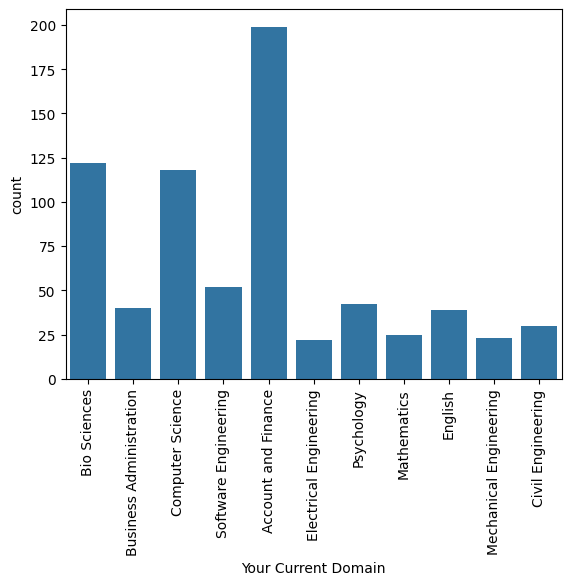

In [18]:
sns.countplot(x=train['Your Current Domain'])
plt.xticks(rotation=90)
plt.show()

In [19]:
print('Class distribution Training set:')
print(train['Your Current Domain'].value_counts())

Class distribution Training set:
Your Current Domain
Account and Finance        199
Bio Sciences               122
Computer Science           118
Software Engineering        52
Psychology                  42
Business Administration     40
English                     39
Civil Engineering           30
Mathematics                 25
Mechanical Engineering      23
Electrical Engineering      22
Name: count, dtype: int64


In [20]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Test_data.csv')

In [21]:
test.head()

,Timestamp,Major Subjects in Matric,Major in Intermediate,Intermediate Percentage,Favorite Subject,Area of Interest,Your Current Domain
0,2022/06/02 1:38:57 AM GMT+5,Computer,I COM,45 - 60,Finance / Accounting / Statistics,Account and Finance,Account and Finance
1,2022/06/02 1:39:10 AM GMT+5,Biology,A Levels,75 - 99,Computer Science,Electrical Engineering,Civil Engineering
2,2022/06/02 1:39:26 AM GMT+5,Biology,Fsc Pre Medical,75 - 99,Mathematics,Civil Engineering,Business Administration
3,2022/06/02 1:39:44 AM GMT+5,Biology,A Levels,75 - 99,Physics,Computer Science,Account and Finance
4,2022/06/02 1:39:58 AM GMT+5,Computer,I COM,60 - 75,English,English,Psychology


In [22]:
test = test.drop('Timestamp', axis=1)
test = test.to_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Test_data.csv', index=False)

In [23]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/Test_data.csv')

In [24]:
train_ = train
# Mã hóa cột cuối cùng
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(np.array(train_)[:, -1])

# Lấy ra số hiệu đã được đánh cho các phần tử cuối cùng của mỗi nhãn
encoded_classes = label_encoder.classes_

# Tạo DataFrame từ số hiệu và nhãn
encoded_df = pd.DataFrame({"Số hiệu": np.arange(len(encoded_classes)), "Nhãn": encoded_classes})

# Lưu DataFrame vào file CSV
encoded_df.to_csv('/content/drive/MyDrive/Colab Notebooks/NCKH/Data/encoded_labels.csv', index=False)

# In ra số hiệu và nhãn tương ứng
print(encoded_df)

    Số hiệu                     Nhãn
0         0      Account and Finance
1         1             Bio Sciences
2         2  Business Administration
3         3        Civil Engineering
4         4         Computer Science
5         5   Electrical Engineering
6         6                  English
7         7              Mathematics
8         8   Mechanical Engineering
9         9               Psychology
10       10     Software Engineering


In [25]:
train.head()

,Major Subjects in Matric,Major in Intermediate,Intermediate Percentage,Favorite Subject,Area of Interest,Your Current Domain
0,Biology,A Levels,75 - 99,Biology,Bio Sciences,Bio Sciences
1,O Level,A Levels,60 - 75,Finance / Accounting / Statistics,Business Administration,Business Administration
2,Biology,A Levels,75 - 99,Physics,Bio Sciences,Bio Sciences
3,Computer,Fsc Pre Engineering,60 - 75,Computer Science,Software Engineering,Computer Science
4,Computer,Fsc Pre Engineering,60 - 75,Computer Science,Software Engineering,Software Engineering


In [26]:
import joblib

In [27]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [28]:
def let(df_train):
    for col in df_train.columns:
        if df_train[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df_train[col] = label_encoder.fit_transform(df_train[col])
let(test)

In [29]:
train.head()

,Major Subjects in Matric,Major in Intermediate,Intermediate Percentage,Favorite Subject,Area of Interest,Your Current Domain
0,1,0,2,0,1,1
1,3,0,1,4,2,2
2,1,0,2,6,1,1
3,2,1,1,2,10,4
4,2,1,1,2,10,10


In [30]:
X_train = train.drop(['Your Current Domain'], axis=1)
Y_train = train['Your Current Domain']

In [31]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=5)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['Major Subjects in Matric',
 'Major in Intermediate',
 'Intermediate Percentage',
 'Favorite Subject',
 'Area of Interest']

In [32]:
X_train = X_train[selected_features]

In [33]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [35]:
x_train.shape

(498, 5)

In [36]:
x_test.shape

(214, 5)

In [37]:
y_train.shape

(498,)

In [38]:
y_test.shape

(214,)

In [39]:
import time

In [40]:
pip install optuna

In [41]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

KNN

In [42]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [43]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=30)
print(study_KNN.best_trial)

FrozenTrial(number=3, state=TrialState.COMPLETE, values=[0.6542056074766355], datetime_start=datetime.datetime(2024, 4, 15, 17, 30, 27, 138268), datetime_complete=datetime.datetime(2024, 4, 15, 17, 30, 27, 208191), params={'KNN_n_neighbors': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=3, value=None)


In [44]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)
joblib.dump(KNN_model, '/content/drive/MyDrive/Colab Notebooks/NCKH/Model/KNN_Model.pkl')

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.7228915662650602
Test Score: 0.6542056074766355


Navie Bayes

In [45]:
def objective(trial):
    var_smoothing = trial.suggest_float('var_smoothing', 1e-10, 1e-6, log=True)
    nb_model = GaussianNB(var_smoothing=var_smoothing)
    nb_model.fit(x_train, y_train)
    accuracy = nb_model.score(x_test, y_test)
    return accuracy

In [46]:
study_NB = optuna.create_study(direction='maximize')
study_NB.optimize(objective, n_trials=30)
print(study_NB.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.6822429906542056], datetime_start=datetime.datetime(2024, 4, 15, 17, 30, 28, 641906), datetime_complete=datetime.datetime(2024, 4, 15, 17, 30, 28, 649055), params={'var_smoothing': 8.105594822055436e-08}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'var_smoothing': FloatDistribution(high=1e-06, log=True, low=1e-10, step=None)}, trial_id=0, value=None)


In [47]:
nb_model = GaussianNB(var_smoothing=study_NB.best_params['var_smoothing'])
nb_model.fit(x_train, y_train)
joblib.dump(nb_model, '/content/drive/MyDrive/Colab Notebooks/NCKH/Model/NB_Model.pkl')

nb_train, nb_test = nb_model.score(x_train, y_train), nb_model.score(x_test, y_test)

print(f"Train Score: {nb_train}")
print(f"Test Score: {nb_test}")

Train Score: 0.6666666666666666
Test Score: 0.6822429906542056


SVM

In [48]:
def objective(trial):
    # Đề xuất tham số
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) if kernel in ['rbf', 'poly', 'sigmoid'] else 'scale'

    svm_model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)

    svm_model.fit(x_train, y_train)

    # Đánh giá độ chính xác của mô hình
    accuracy = svm_model.score(x_test, y_test)

    # Trả về độ chính xác làm mục tiêu của quá trình tối ưu hóa
    return accuracy

In [49]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=10)

print(study_svm.best_trial)

<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)


FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.6495327102803738], datetime_start=datetime.datetime(2024, 4, 15, 17, 45, 44, 30683), datetime_complete=datetime.datetime(2024, 4, 15, 17, 51, 25, 783953), params={'C': 15220.2433568068, 'kernel': 'linear'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=100000.0, log=True, low=1e-05, step=None), 'kernel': CategoricalDistribution(choices=('linear', 'poly', 'rbf', 'sigmoid'))}, trial_id=2, value=None)


<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
<ipython-input-48-5aa9066e0bd8>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0.

In [50]:
best_C = study_svm.best_params['C']
best_kernel = study_svm.best_params['kernel']
if 'degree' in study_svm.best_params:
    best_degree = study_svm.best_params['degree']
else:
    best_degree = 3

final_svm_model = SVC(C=best_C, kernel=best_kernel, degree=best_degree)
final_svm_model.fit(x_train, y_train)
joblib.dump(final_svm_model, '/content/drive/MyDrive/Colab Notebooks/NCKH/Model/SVM_Model.pkl')

svm_train, svm_test = final_svm_model.score(x_train, y_train), final_svm_model.score(x_test, y_test)

print(f'Training Score: {svm_train}')
print(f'Testing Score: {svm_test}')

Training Score: 0.6827309236947792
Testing Score: 0.6495327102803738


In [54]:
data = [["KNN", KNN_train, KNN_test],
        ["Naive Bayes", nb_train, nb_test],
        ["SVM", svm_train, svm_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════╤═══════════════╤══════════════╕
│ Model       │   Train Score │   Test Score │
╞═════════════╪═══════════════╪══════════════╡
│ KNN         │      0.722892 │     0.654206 │
├─────────────┼───────────────┼──────────────┤
│ Naive Bayes │      0.666667 │     0.682243 │
├─────────────┼───────────────┼──────────────┤
│ SVM         │      0.682731 │     0.649533 │
╘═════════════╧═══════════════╧══════════════╛


In [55]:
SEED = 42

knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC()

In [56]:
models = {}
models['KNeighborsClassifier']= knn
models['Naive Bayes Classification']= nb
models['Support Vector Machine']= svm

In [57]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [58]:
import sklearn.metrics as metrics

<Axes: >

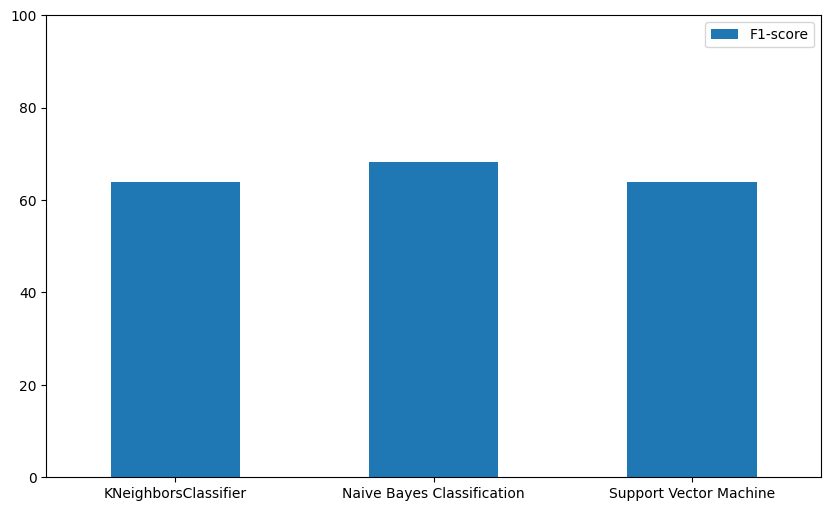

In [59]:
f1s = {}

for name in models:
    if name in preds:
        predictions = preds[name]

        if len(predictions.shape) == 2:
            # Nếu là mảng 2 chiều, sử dụng argmax(axis=1)
            f1s[name] = metrics.fbeta_score(y_test, predictions.argmax(axis=1), beta=1.0, average='micro')
        elif len(predictions.shape) == 1:
            # Nếu là mảng 1 chiều, không cần sử dụng argmax(axis=1)
            f1s[name] = metrics.fbeta_score(y_test, predictions, beta=1.0, average='micro')

f1s = pd.DataFrame(f1s.values(), index=f1s.keys(), columns=["F1-score"]) * 100
f1s.plot(kind="bar", ylim=[0, 100], figsize=(10, 6), rot=0)